# Riconoscimento di animal
Questo notebook verrà utilizzato per addestrare un modello a riconoscere diversi animali.

## Caricamento e preparazione del dataset CIFAR-10
Selezioniamo solo le classi di veicoli e animali che ci interessano

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Caricamento e preparazione del dataset CIFAR-10
# Selezioniamo solo le classi di veicoli e animali che ci interessano
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# Classi del dataset CIFAR-10
class_names = ['aereo', 'automobile', 'uccello', 'gatto', 'cervo', 'cane', 'rana', 'cavallo', 'nave', 'camion']

# Mappatura delle classi a veicoli o animali
# Veicoli: aereo, automobile, nave, camion (indici 0, 1, 8, 9)
# Animali: uccello, gatto, cervo, cane, rana, cavallo (indici 2, 3, 4, 5, 6, 7)
vehicle_indices = [0, 1, 8, 9]
animal_indices = [2, 3, 4, 5, 6, 7]

2025-09-04 09:49:09.543012: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-04 09:49:09.625904: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-04 09:49:11.609540: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step


## Addestramento del modello

In [2]:
# Funzione per filtrare il dataset e creare le nuove etichette binarie
def filter_dataset(images, labels):
    filtered_images = []
    filtered_labels = []
    for img, label in zip(images, labels):
        if label in vehicle_indices:
            filtered_images.append(img)
            filtered_labels.append(1)  # 1 per Veicolo
        elif label in animal_indices:
            filtered_images.append(img)
            filtered_labels.append(0)  # 0 per Animale
    return np.array(filtered_images), np.array(filtered_labels)

train_images, train_labels = filter_dataset(train_images, train_labels)
test_images, test_labels = filter_dataset(test_images, test_labels)

# Pre-elaborazione dei dati
# Normalizzazione dei pixel
train_images, test_images = train_images / 255.0, test_images / 255.0

# Costruzione del modello CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid') # Strato di output per classificazione binaria
])

# Compilazione del modello
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Stampa un riepilogo del modello
model.summary()

# Addestramento del modello
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

/home/gab25/Projects/animal_recognition/.venv/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-04 09:49:52.639271: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,985 (476.50 KB)

 Trainable params: 121,985 (476.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8790 - loss: 0.2920 - val_accuracy: 0.9017 - val_loss: 0.2428
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9120 - loss: 0.2210 - val_accuracy: 0.9212 - val_loss: 0.1953
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9221 - loss: 0.1973 - val_accuracy: 0.9212 - val_loss: 0.1940
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9299 - loss: 0.1791 - val_accuracy: 0.9259 - val_loss: 0.1903
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9366 - loss: 0.1625 - val_accuracy: 0.9284 - val_loss: 0.1832
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9436 - loss: 0.1460 - val_accuracy: 0.9328 - val_loss: 0.1728
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9493 - loss: 0.1314 - val_accuracy: 0.9315 - val_loss: 0.1770
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9544 - loss: 0

## Valutazione del modello

313/313 - 1s - 3ms/step - accuracy: 0.9332 - loss: 0.2042

Accuratezza sul set di test: 93.32%


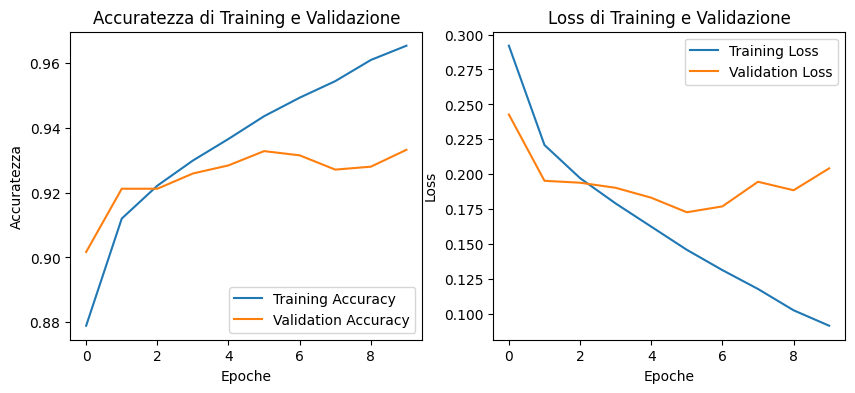

In [3]:
# Valutazione del modello
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f'\nAccuratezza sul set di test: {test_acc*100:.2f}%')

# Visualizzazione dei risultati
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoche')
plt.ylabel('Accuratezza')
plt.legend(loc='lower right')
plt.title('Accuratezza di Training e Validazione')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoche')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss di Training e Validazione')
plt.show()

## Predizione

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


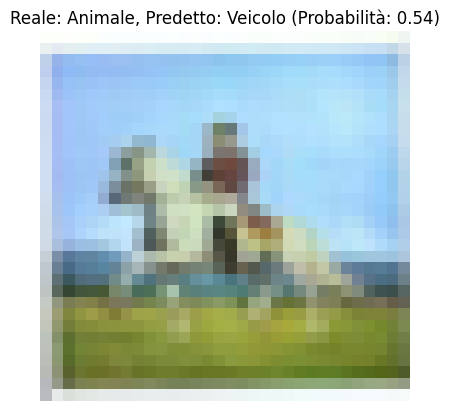

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


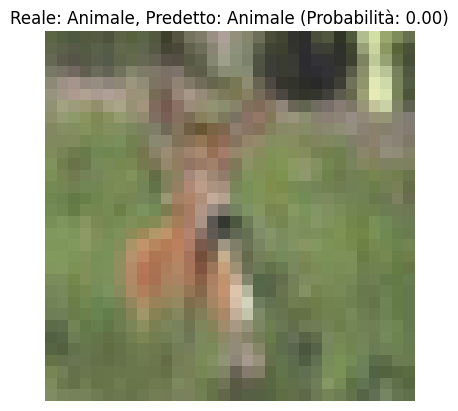

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


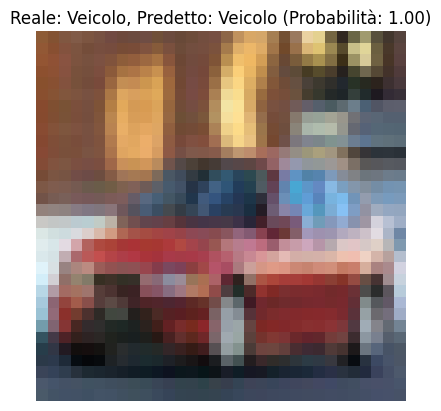

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


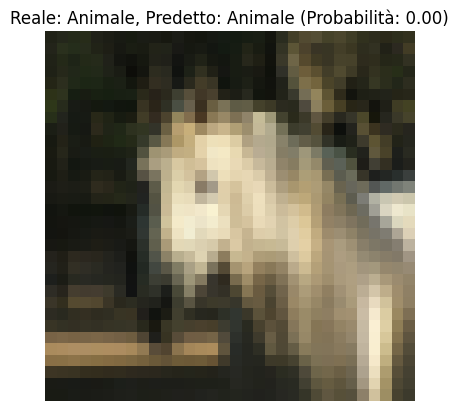

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


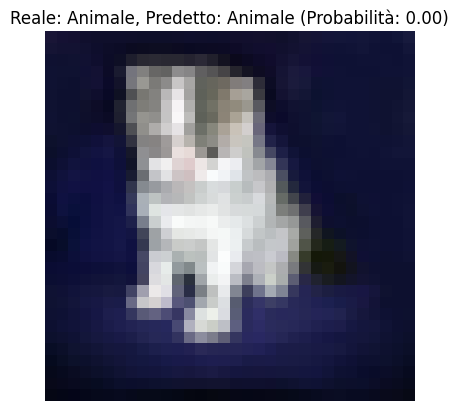

In [4]:
# Esempio di predizione su un'immagine
def predict_image(model, image, label):
    prediction = model.predict(np.expand_dims(image, axis=0))[0][0]
    predicted_class = "Veicolo" if prediction > 0.5 else "Animale"
    true_class = "Veicolo" if label == 1 else "Animale"

    plt.imshow(image)
    plt.title(f"Reale: {true_class}, Predetto: {predicted_class} (Probabilità: {prediction:.2f})")
    plt.axis('off')
    plt.show()

# Predizione su alcune immagini casuali dal set di test
num_examples = 5
random_indices = np.random.choice(len(test_images), num_examples, replace=False)
for i in random_indices:
    predict_image(model, test_images[i], test_labels[i])